              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Energy_Recovery_in_GWh Ozone AQI Category  NO2 AQI Value  \
0            Good                      36               Good              0   
1            Good                       5               Good              1   
2            Good                      39               Good              2   
3            Good                      34               Good              0   
4            Good                      22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM

C:\Users\immah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\immah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9032601747283188
Precision: 0.902537323029136
Recall: 0.9032601747283188
F1-score: 0.8873007341482049


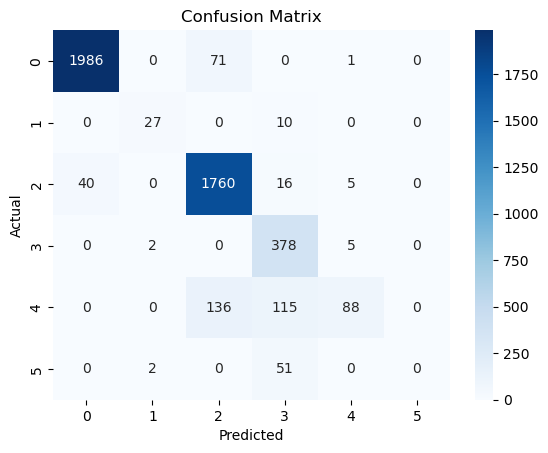

       PM2.5 AQI Value
count     23462.000000
mean         68.522675
std          54.795785
min           2.000000
25%          35.000000
50%          54.000000
75%          79.000000
max         500.000000


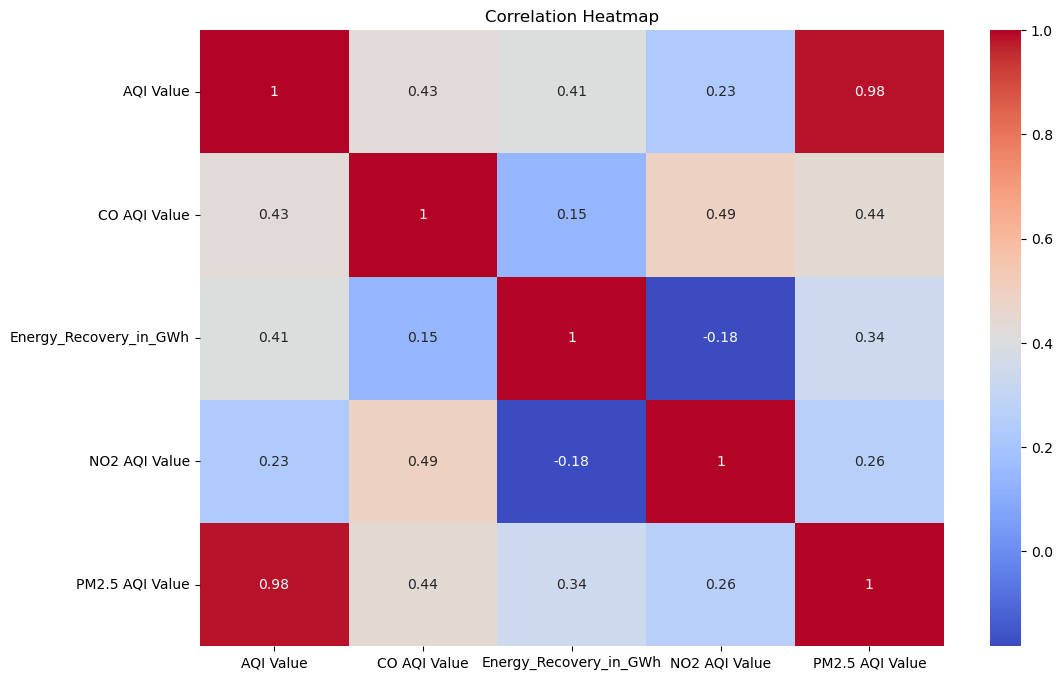

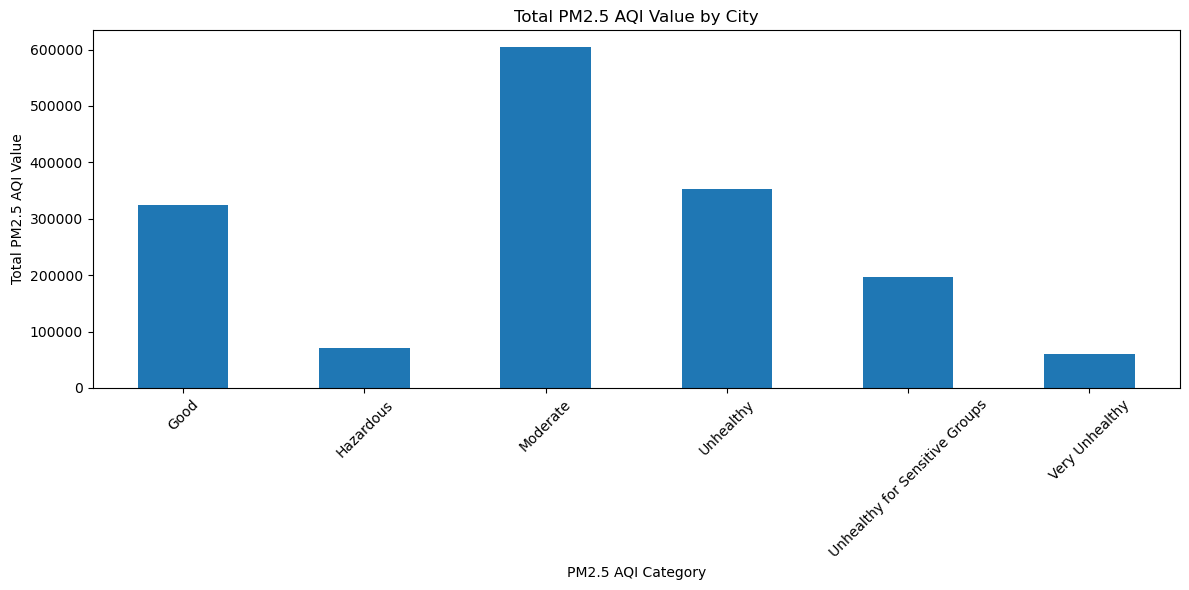

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)


df = pd.read_csv("global air pollution dataset.csv")


print(df.head())
print("Total missing values:", df.isnull().sum().sum())
df.replace("N/A", np.nan, inplace=True)  
df.fillna(0, inplace=True)
print("Any nulls after cleaning:", df.isnull().values.any())




X = df[['AQI Value', 'CO AQI Value', 'NO2 AQI Value']]
y = df['Energy_Recovery_in_GWh']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)


print(f'R²: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')




df['PM2.5 AQI Value'] = pd.to_numeric(df['PM2.5 AQI Value'], errors='coerce')
df.dropna(subset=['PM2.5 AQI Value'], inplace=True)


bins = [0, 50, 100, 150, 200, 300, np.inf]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['PM2.5_Category_Label'] = pd.cut(df['PM2.5 AQI Value'], bins=bins, labels=labels)

df.dropna(subset=['PM2.5_Category_Label'], inplace=True)  

X_logistic = df[['AQI Value', 'CO AQI Value', 'NO2 AQI Value']]
y_logistic = df['PM2.5_Category_Label']


X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)


logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_log, y_train_log)
y_pred_log = logistic_model.predict(X_test_log)


print(f'Accuracy: {accuracy_score(y_test_log, y_pred_log)}')
print(f'Precision: {precision_score(y_test_log, y_pred_log, average="weighted")}')
print(f'Recall: {recall_score(y_test_log, y_pred_log, average="weighted")}')
print(f'F1-score: {f1_score(y_test_log, y_pred_log, average="weighted")}')


conf_matrix = confusion_matrix(y_test_log, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




scaler = StandardScaler()
df[['AQI Value', 'CO AQI Value', 'NO2 AQI Value']] = scaler.fit_transform(df[['AQI Value', 'CO AQI Value', 'NO2 AQI Value']])


df = pd.get_dummies(df, columns=['Country', 'City'], drop_first=True)



if 'PM2.5 AQI Category' in df.columns:
    df['PM2.5 AQI Category'] = df['PM2.5 AQI Category'].astype(str)

print(df[['PM2.5 AQI Value']].describe())


numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()




if 'PM2.5 AQI Category' in df.columns:
    df.groupby('PM2.5 AQI Category')['PM2.5 AQI Value'].sum().plot(kind='bar', figsize=(12, 6))
    plt.title('Total PM2.5 AQI Value by City')
    plt.xlabel('PM2.5 AQI Category')
    plt.ylabel('Total PM2.5 AQI Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


if 'Total_Energy_Consumption' in df.columns and 'Population' in df.columns:
    df['Energy_Consumption_per_Capita'] = df['Total_Energy_Consumption'] / df['Population']
    print(df[['Energy_Consumption_per_Capita']].head())

